In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] #데이터셋에 칼럼 이름 할당
dataset = pd.read_csv('iris.data')

In [22]:
#훈련과 테스트 데이터셋 분리
X = dataset.iloc[:, :-1].values #마지막 칼럼(acc)빼고 다
y = dataset.iloc[:,4].values #마지막 칼럼

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #X,y 훈련과 데이터셋으로 분리

from sklearn.preprocessing import StandardScaler #평균0 표준편차1 변환
s = StandardScaler()
X_train = s.fit_transform(X_train) #훈련 데이터를 스케일링 처리
X_test = s.fit_transform(X_test) #테스트 데이터를 스케일링 처리

In [24]:
#모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) #k=50인 knn 실행
knn.fit(X_train, y_train) #모델 훈련

KNeighborsClassifier(n_neighbors=50)

In [26]:
#모델 정확도
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.9


In [30]:
#최적의 k 값 찾기
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1): #k를 1부터 10까지
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) #for문 반복하며 k 값 변경
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도는", max_acc, "으로 최적의 k는", k+1, "입니다.")

정확도는 1.0 으로 최적의 k는 1 입니다.


서포트 벡터 머신 코드 공부

In [45]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [47]:
#iris 데이터 준비, 훈련/데이터셋 분리
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)

In [49]:
#svm 모델에 대한 정확도
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


In [61]:
import pandas as pd
df = pd.read_csv('train.csv', index_col = 'PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [63]:
#데이터 전처리
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male':0, 'female':1}) #성별 파트는 0,1의 정수값으로 변환
df = df.dropna() #값이 없는 데이터 삭제
X = df.drop('Survived', axis=1)
y = df['Survived'] #Survived 값을 예측 레이블로 사용

In [65]:
#훈련과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [67]:
#결정 트리 모델 생성
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [69]:
#모델 훈련
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
#모델 예측
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8324022346368715

In [75]:
#혼동 행렬을 이용한 성능 측정
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ['Predicted Not Survival', 'Predicted Survival'],
    index = ['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,98,14
True Survival,16,51


In [77]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


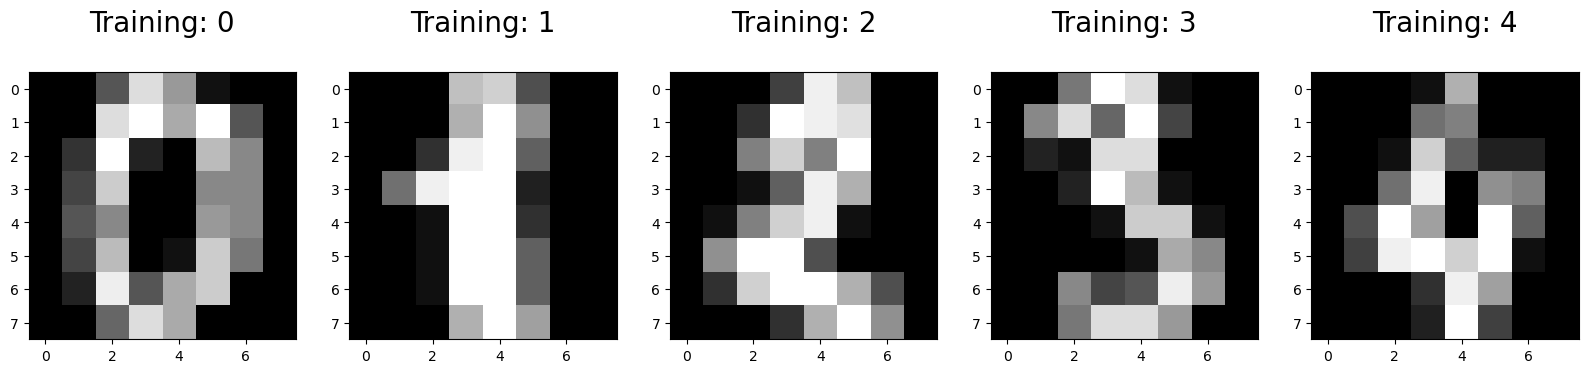

In [79]:
#digits 데이터셋의 시각화
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])): #예시로 이미지 5개만 확인
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' %label, fontsize=20)

In [81]:
#훈련과 테스트 데이터셋 분리 및 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
#일부 데이터를 사용한 모델 예측
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [87]:
logisticRegr.predict(x_test[0:10]) #이미지 열 개에 대한 예측을 한번에 배열로 출력

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [89]:
#전체 데이터를 사용한 모델 예측
predictions = logisticRegr.predict(x_test) #전체 데이터셋에 대한 예측
score = logisticRegr.score(x_test, y_test) #score 메서드를 사용한 성능 측정
print(score)

0.9511111111111111


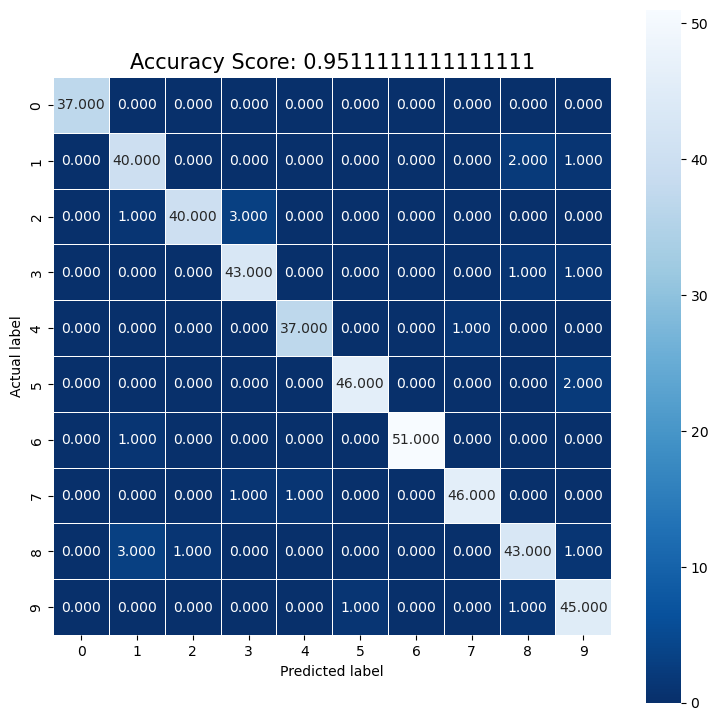

In [93]:
#혼동 행렬 시각화
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.show();

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [97]:
dataset = pd.read_csv('weather.csv')

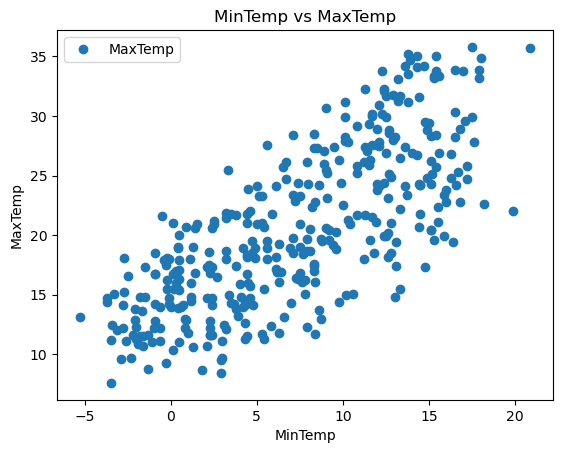

In [99]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [101]:
#데이터를 독립 변수와 종속 변수로 분리하고 선형 회귀 모델 생성
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [103]:
#회귀 모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,23.3,20.666942
1,33.8,27.014652
2,14.2,13.917479
3,13.2,17.774315
4,12.2,14.158531
...,...,...
69,30.3,27.898510
70,13.8,12.953270
71,10.6,15.685196
72,30.2,24.523778


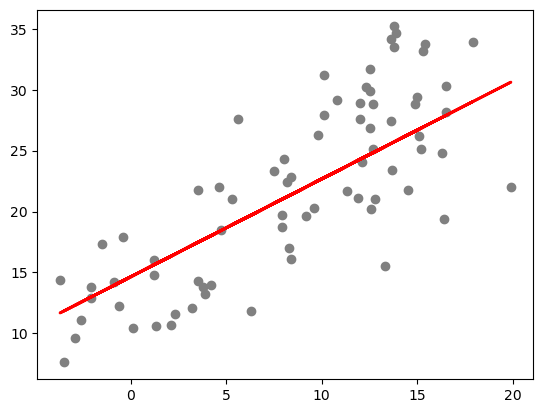

In [105]:
#테스트 데이터셋을 사용한 회귀선 표현
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [107]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 21.39153042551359
루트 평균제곱법: 4.6250978828035185
